## Importing Librareis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
#import decision_tree_regressor as dtr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading Dataset

In [2]:
# Read the data from the xlsx file
df = pd.read_excel('one_specie.xlsx', sheet_name='Export_Output_3')
df.head()

,FID,latitude_c,longitude_c,species,Present_Surface_Temperature_Max_asc,Present_Surface_Salinity_Mean_asc,Present_Surface_Salinity_max_asc
0,0,43.0536,144.9063,Halodule uninervis,18.897499,32.2477,33.081501
1,1,43.0566,144.9061,Halodule uninervis,18.897499,32.2477,33.081501
2,2,43.0585,144.9060,Halodule uninervis,18.897499,32.2477,33.081501
3,3,43.0621,144.9059,Halodule uninervis,18.897499,32.2477,33.081501
4,4,43.0639,144.9059,Halodule uninervis,18.897499,32.2477,33.081501


## Cehcking Null values

In [3]:
#checking null values
df.isnull().sum()

FID                                    0
latitude_c                             0
longitude_c                            0
species                                0
Present_Surface_Temperature_Max_asc    0
Present_Surface_Salinity_Mean_asc      0
Present_Surface_Salinity_max_asc       0
dtype: int64

In [4]:
#drop FID
df.drop(['FID'], axis=1, inplace=True)

In [5]:
#shape of the data
df.shape

(80407, 6)

In [6]:
#descriptive statistics
df.describe()

,latitude_c,longitude_c,Present_Surface_Temperature_Max_asc,Present_Surface_Salinity_Mean_asc,Present_Surface_Salinity_max_asc
count,80407.000000,80407.000000,80407.000000,80407.000000,80407.000000
mean,-11.121555,146.201751,-554.930742,-548.574565,-547.954825
std,20.951473,7.841823,2346.726344,2348.304935,2348.458900
min,-32.050000,-175.152556,-9999.000000,-9999.000000,-9999.000000
25%,-23.733630,145.770950,27.760700,34.939999,35.481400
50%,-19.243890,146.886820,28.644100,35.209400,35.804901
75%,-16.758390,151.160540,29.506100,35.383999,36.019199
max,43.067600,178.515000,34.519199,40.137600,40.922298


<AxesSubplot:>

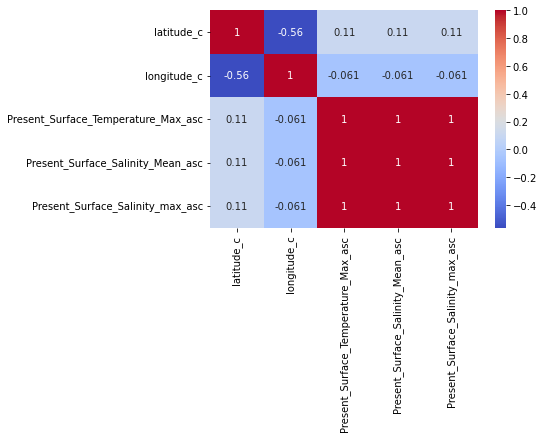

In [7]:
#heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Checking Distribution

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


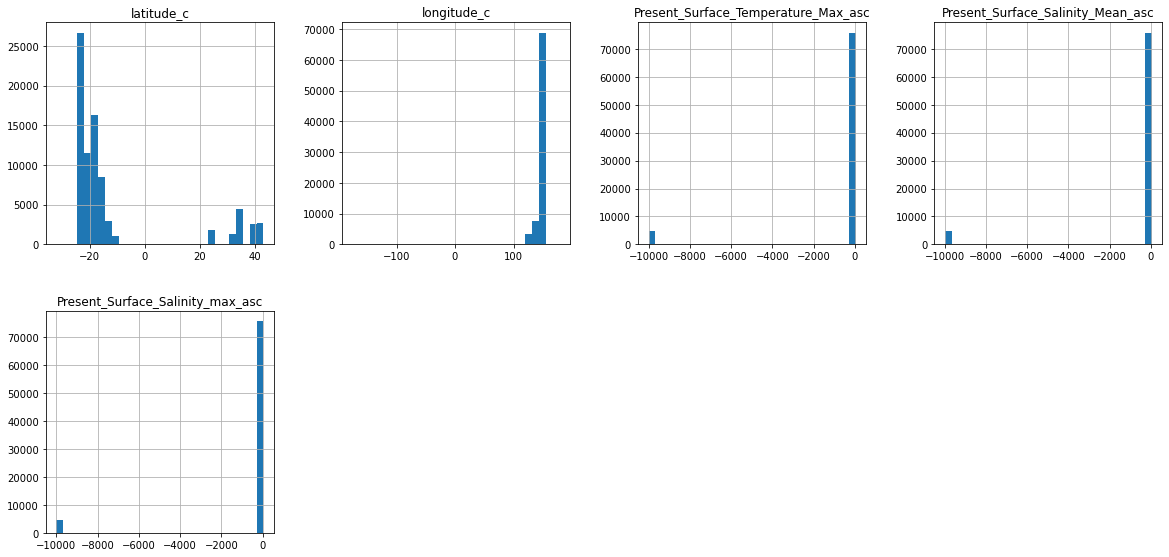

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


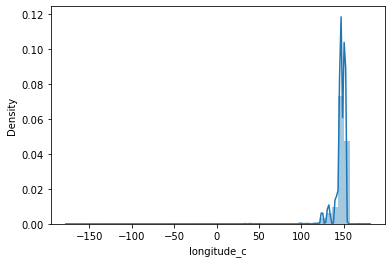

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


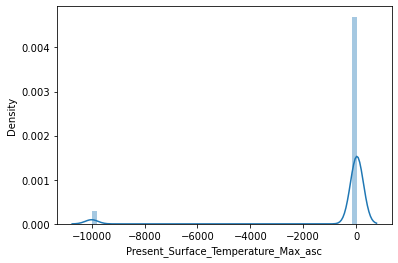

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


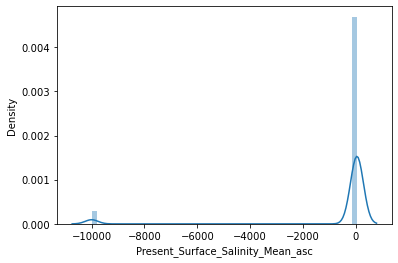

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


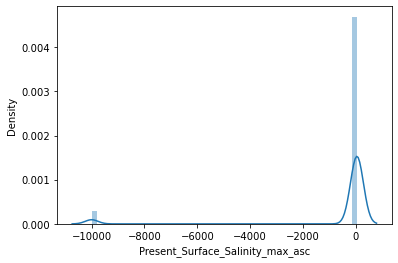

In [8]:
#checking the distribution of all lthe columns using histogram
df.hist(figsize=(20,20), grid=True, layout=(4,4), bins=30)
#checking the distribution of all the numerical columns using distplot
for i in df.columns:
    if df[i].dtype != 'object':
        sns.distplot(df[i])
        plt.show()


In [9]:
#make a copy of df
df1 = df.copy()
df1.head()

,latitude_c,longitude_c,species,Present_Surface_Temperature_Max_asc,Present_Surface_Salinity_Mean_asc,Present_Surface_Salinity_max_asc
0,43.0536,144.9063,Halodule uninervis,18.897499,32.2477,33.081501
1,43.0566,144.9061,Halodule uninervis,18.897499,32.2477,33.081501
2,43.0585,144.9060,Halodule uninervis,18.897499,32.2477,33.081501
3,43.0621,144.9059,Halodule uninervis,18.897499,32.2477,33.081501
4,43.0639,144.9059,Halodule uninervis,18.897499,32.2477,33.081501


c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


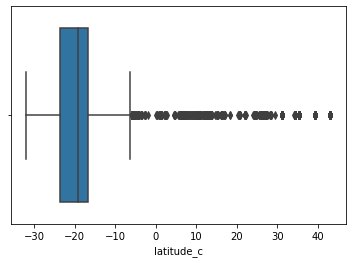

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


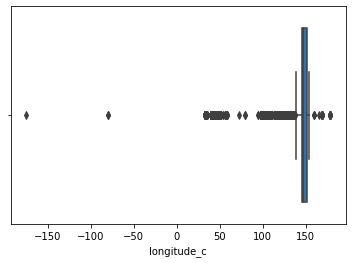

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


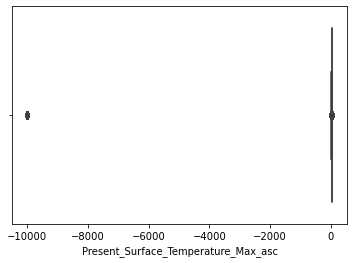

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


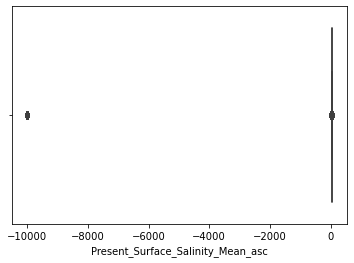

c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


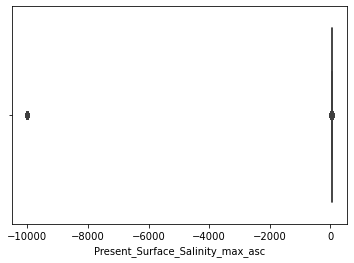

In [10]:
#cheking the distribution of all the columns using boxplot
for i in df1.columns:
    if df1[i].dtype != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [11]:
numeric_cols = df1.select_dtypes(include=[np.number])

# Calculate the IQR for each numeric column
Q1 = numeric_cols.quantile(0.01)
Q3 = numeric_cols.quantile(0.9)
IQR = Q3 - Q1

# Define a multiplier to determine the threshold for outliers
multiplier = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (multiplier * IQR)
upper_bound = Q3 + (multiplier * IQR)

# Identify the outliers using the lower and upper bounds
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
outlier_indices = outliers[outliers].index

# Remove the outliers from the dataframe
clean_df = df1.drop(outlier_indices)

In [12]:
clean_df.shape

(80264, 6)

In [13]:
# Split the data into input features (X) and output variables (y)
X = clean_df[['Present_Surface_Temperature_Max_asc', 'Present_Surface_Salinity_Mean_asc', 'Present_Surface_Salinity_max_asc']]
y = clean_df[['latitude_c', 'longitude_c']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.996723361478892
Score for output variable 2 using RandomForestRegressor: 0.968375823585603
Score for output variable 1 using Ridge: 0.3524211537549441
Score for output variable 2 using Ridge: 0.27433573901976027


c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+07, tolerance: 2.813e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e+05, tolerance: 2.555e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using Lasso: 0.011109947760504557
Score for output variable 2 using Lasso: 0.004435801011052121


c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+07, tolerance: 2.813e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.764e+05, tolerance: 2.555e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using ElasticNet: 0.011116196975796688
Score for output variable 2 using ElasticNet: 0.004468077815874993
Score for output variable 1 using LinearRegression: 0.35241296707560854
Score for output variable 2 using LinearRegression: 0.27433904207325477
Score for output variable 1 using SVR: -0.15287333609338316
Score for output variable 2 using SVR: -0.005407453328328149


c:\Users\AbdulRaheemShahzad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for output variable 1 using MLPRegressor: 0.9402354940746809
Score for output variable 2 using MLPRegressor: 0.5277826022350283
Score for output variable 1 using KNeighborsRegressor: 0.9960799787231516
Score for output variable 2 using KNeighborsRegressor: 0.9627728929380232


In [16]:
# List of machine learning models
models = [GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")

Score for output variable 1 using GradientBoostingRegressor: 0.9961009625401979
Score for output variable 2 using GradientBoostingRegressor: 0.9615908119964792
Score for output variable 1 using AdaBoostRegressor: 0.9776170830569175
Score for output variable 2 using AdaBoostRegressor: 0.8198426064713494
Score for output variable 1 using DecisionTreeRegressor: 0.9966011062554618
Score for output variable 2 using DecisionTreeRegressor: 0.9662875663758477
Score for output variable 1 using BaggingRegressor: 0.9966982855492502
Score for output variable 2 using BaggingRegressor: 0.9672635576917468
Score for output variable 1 using ExtraTreesRegressor: 0.9967235945152764
Score for output variable 2 using ExtraTreesRegressor: 0.9690652813650522
Score for output variable 1 using XGBRegressor: 0.9967402792988767
Score for output variable 2 using XGBRegressor: 0.9680093019780841


In [14]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Print the model's score
print(model.score(X_test, y_test))

0.9838584465524003


In [15]:
#checking score for each output variable
print(model.estimators_[0].score(X_test, y_test.iloc[:,0]))
print(model.estimators_[1].score(X_test, y_test.iloc[:,1]))


0.9965865027477251
0.9711303903570755


In [16]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_model = rf_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")


Score for output variable 1: 0.9965865027477251
Score for output variable 2: 0.9711303903570755


In [17]:


# Create the MultiOutputRegressor model
xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb_model = xgb_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

#dump model using pickle
import pickle
pickle.dump(model, open('xgb_model_one_specie.pkl','wb'))



Score for output variable 1: 0.9966721932513182
Score for output variable 2: 0.9732641133765437


In [18]:
# Create the ensemble model by averaging the predictions
ensemble_predictions = (y_pred_rf_model + y_pred_xgb_model) / 2

In [24]:
# Evaluate the mean squared error of individual models
rf_mse = mean_squared_error(y_test, y_pred_rf_model)
xgb_mse = mean_squared_error(y_test, y_pred_xgb_model)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)
print("Ensemble MSE:", ensemble_mse)


Random Forest MSE: 2.3912481323997863
XGBoost MSE: 2.0882784653068307
Ensemble MSE: 2.118652559612971


In [19]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model1 = RandomForestRegressor()
xgb_model1 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model1), ('xg', xgb_model1)]))

# Fit the voting regressor to the training data
voting.fit(X_train, y_train)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                           

In [20]:
# predict on the test data
y_pred_voting = voting.predict(X_test)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test, y_test)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.99666091604815
Score for output variable 2: 0.9728469538771228
Voting Score: 0.9847539349626364


In [21]:
#MSE for each model
rf_mse = mean_squared_error(y_test, y_pred_rf_model)
xgb_mse = mean_squared_error(y_test, y_pred_xgb_model)
voting_mse = mean_squared_error(y_test, y_pred_voting)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)
print("Voting MSE:", voting_mse)


Random Forest MSE: 1.3269623598389462
XGBoost MSE: 1.2656386164170956
Voting MSE: 1.2764199147500435


In [22]:
#dump xgb model using pickle
import pickle
pickle.dump(xgb_model, open('xgb_halodule_uninrvis_current_distribution.pkl','wb'))
